# Trends with quasar properties $(M_{i}, M_{BH}, z)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import unique
from astropy.table import Column
from astropy.table import join
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

Make Fig. 12, but only plot the distribution of Shen2011, since that's the one I end up using ... '

In [17]:
# Read the Celerite results joined on dbID  to DBQSO  - thus it has DR7 data 
celerite  = Table.read("190409_Celerite_real_Jeff1_radec.txt", format='ascii')

# Add Shen2011
cat = Table.read("../code/dr7_bh_May_2011.fits", format='fits')

# select only those in S82  : select by dec, and crossmatch
shen2011 = cat[abs(cat['DEC']) < 1.5]['SDSS_NAME', 'RA', 'DEC', 'REDSHIFT', 
        'LOGLBOL', 'LOGBH', 'LOGBH_ERR', 'LOGEDD_RATIO','MI_Z2' ]

# crossmatch 
cat1 = SkyCoord(ra=celerite['ra']*u.degree, 
                dec=celerite['dec']*u.degree)
cat2 = SkyCoord(ra=shen2011['RA']*u.degree,
                dec=shen2011['DEC']*u.degree, frame='icrs') 

idx, sep2d, dist3d = cat1.match_to_catalog_sky(cat2) 
qso = hstack([celerite, shen2011[idx]])

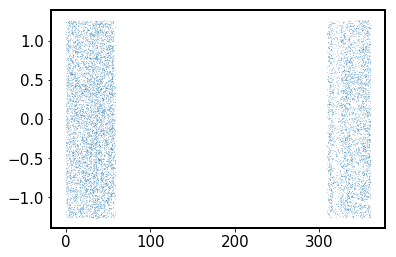

In [9]:
%matplotlib inline
plt.scatter(cat1.ra.deg,  cat1.dec.deg , s=0.01)

(-90, 90)

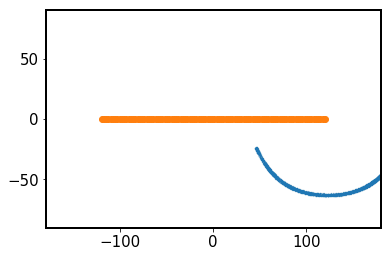

In [16]:
import healpy as hp
plt.scatter(cat1.galactic.l, cat1.galactic.b, s=0.01)
plt.scatter(np.linspace(-120,120,100), np.zeros(100), )
plt.xlim(-180,180)
plt.ylim(-90,90)

## Fig.12 : Quasar properties 

In [19]:
qso[:3]

lcname,length_sdss,sigmaEXP_sdss,sigmaMAP_sdss,tauEXP_sdss,tauMAP_sdss,length_sdss-ps1,sigmaEXP_sdss-ps1,sigmaMAP_sdss-ps1,tauEXP_sdss-ps1,tauMAP_sdss-ps1,dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au,SDSS_NAME,RA,DEC,REDSHIFT,LOGLBOL,LOGBH,LOGBH_ERR,LOGEDD_RATIO,MI_Z2
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes18,float64,float64,float64,float64,float64,float64,float64,float64
70.txt,3336.9332799999975,0.06622421705058883,0.05984751944546515,122.6490220515577,43.947398211560085,5147.007797999999,--,0.1414213562373095,--,575.0000000000001,70,2.169302,1.238649,301,-23.901,-24.181,1.073,0.0,0.0,20.793,20.469,20.197,20.04,20.0,0.116,000840.63+011419.1,2.1693060398101807,1.2386499643325806,1.073699951171875,45.52781425110629,7.523330610633552,1.5230929717266002,-0.09588690464482141,-24.28560773968867
98.txt,2582.962741999996,0.17768456506773989,0.1425442932431927,926.094822794734,346.4224029622469,4767.016951999998,0.17310108214083317,0.15534946096966964,366.7595534657186,195.0728544419519,98,1.091028,0.962126,144,-23.399,-23.576,0.7867,0.0,0.0,20.79,20.183,19.849,19.818,19.43,0.183,000421.84+005743.6,1.0910290479660034,0.9621239900588989,0.792900025844574,45.421472462631726,8.817950339204,0.1672667771274661,-1.4968484216898403,-23.96421289067481
233.txt,3321.0338420000044,0.10075751425165866,0.08457207262730722,656.8411333494078,193.68268108139895,5505.090184000001,0.08836165515962953,0.08481144613166788,23.17606014197748,15.432798620779016,233,0.331289,0.17723,58,-24.735,-25.058,1.6199,0.0,0.0,20.892,20.554,20.431,20.199,20.099,0.154,000119.50+001038.0,0.33128899335861206,0.17722800374031067,1.62090003490448,45.95221191379889,8.921718166686233,0.20424216150370847,-1.0698767980049055,-25.008960685706665


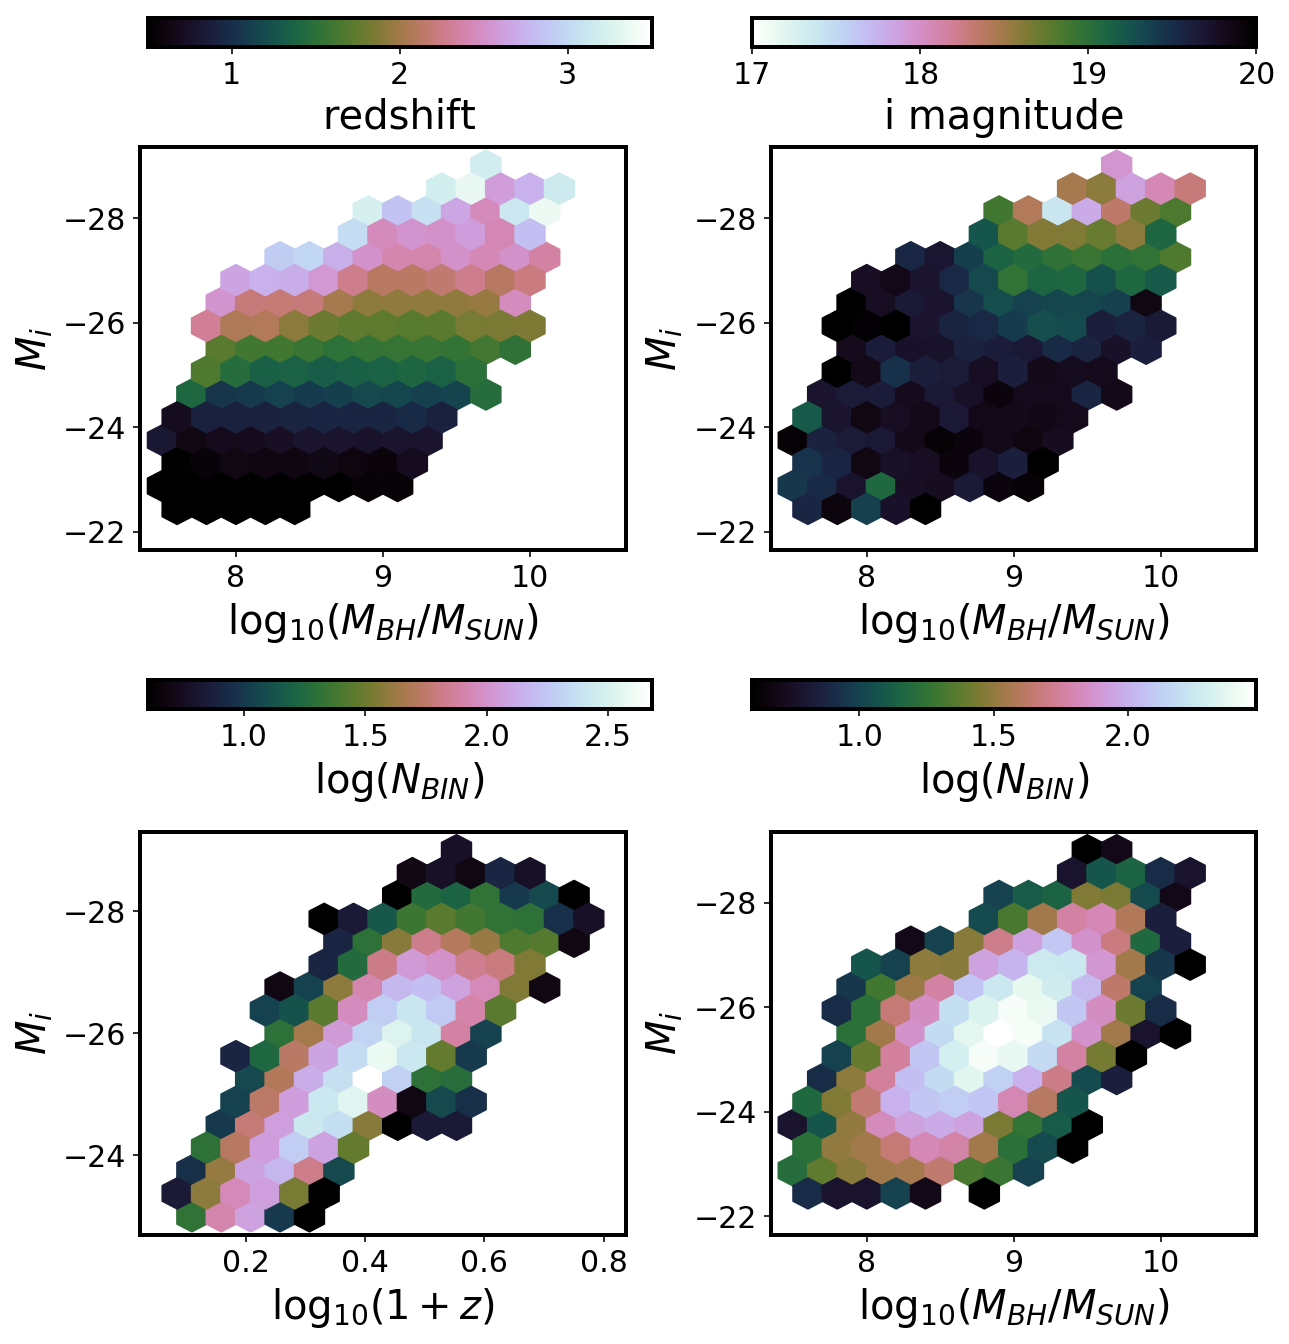

In [120]:
%config InlineBackend.figure_format='retina'

cmap = 'cubehelix'

# plotted quantities : 
# absolute i-band magnitude K-corr to z=2 
MI = qso['MI_Z2'] # Shen2011 

## i-band magnitude  -use DBQSO now, but 
# later perhaps calculate the median of SDSS light curves ?  
# not sure what would be the difference - the light curves are not 
# corrected for extinction, but what about the DBQSO values ? 
imag = qso['i']

# redshift  : Shen2011 
z =  qso['REDSHIFT']

# black hole mass from Shen+2011
MBH = qso['LOGBH']

gridsize=15

fig,axs = plt.subplots(2,2, figsize=(10,10))
ax = np.ravel(axs)

# upper left 
image = ax[0].hexbin(MBH, MI, z , extent = [7.5,10.5, -22,-29], 
                     vmin = 0.5, vmax =3.5, mincnt=4, cmap=cmap, gridsize=gridsize)
ax[0].set_xlabel(r'$\log_{10}{(M_{BH} / M_{SUN})}$')
ax[0].set_ylabel(r'$M_{i}$')
ax[0].invert_yaxis()

left, bottom, width, height = 0.13, 0.95, 0.35, 0.02
cax = fig.add_axes([left,bottom,width,height])
plt.colorbar(mappable = image, cax = cax, orientation='horizontal',
            label='redshift')

fig.subplots_adjust(hspace=0.4)


# upper right  
image = ax[1].hexbin(MBH, MI,imag ,
            extent = [7.5,10.5, -22,-29],vmin=17, vmax = 20, mincnt=4,
                     cmap=cmap+'_r', gridsize=gridsize)
ax[1].set_xlabel(r'$\log_{10}{(M_{BH} / M_{SUN})}$')
ax[1].set_ylabel(r'$M_{i}$')
ax[1].invert_yaxis()

left, bottom, width, height = 0.55, 0.95, 0.35, 0.02
cax = fig.add_axes([left,bottom,width,height])
cbar = plt.colorbar(mappable = image, cax = cax, orientation='horizontal',
            label='i magnitude')
#cbar.ax.invert_xaxis()


# lower left 
image = ax[2].hexbin(np.log10(1+z),MI,
            extent = [0.06,0.8, -23,-29],  cmap=cmap,
                    gridsize=gridsize, bins='log',mincnt=4)
#                     vmin = 0.6, vmax =3.5,) 
ax[2].set_xlabel(r'$\log_{10}{(1+z)}$')
ax[2].set_ylabel(r'$M_{i}$')
ax[2].invert_yaxis() 
left, bottom, width, height = 0.13, 0.49, 0.35, 0.02
cax = fig.add_axes([left,bottom,width,height])

vmin, vmax = image.get_clim()
norm = mpl.colors.Normalize(vmin=np.log10(vmin), vmax=np.log10(vmax))
cbar_cmap = mpl.cm.ScalarMappable(norm=norm, cmap=image.get_cmap())
cbar_cmap.set_array([])

plt.colorbar(mappable = cbar_cmap, cax = cax, orientation='horizontal',
            label=r'$\log{(N_{BIN})}$')


# lower right 
image = ax[3].hexbin(MBH, MI,extent = [7.5,10.5, -22,-29],  cmap=cmap,
                    gridsize=gridsize, bins='log', mincnt=4
                    ) # vmin = 0.6, vmax =3., 
ax[3].invert_yaxis() 
ax[3].set_xlabel(r'$\log_{10}{(M_{BH} / M_{SUN})}$')
ax[3].set_ylabel(r'$M_{i}$')
left, bottom, width, height = 0.55, 0.49, 0.35, 0.02
cax = fig.add_axes([left,bottom,width,height])

import matplotlib as mpl
vmin, vmax = image.get_clim()
norm = mpl.colors.Normalize(vmin=np.log10(vmin), vmax=np.log10(vmax))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=image.get_cmap())
cmap.set_array([])

plt.colorbar(mappable = cmap, cax = cax, orientation='horizontal',
            label=r'$\log{(N_{BIN})}$')

fig.subplots_adjust(hspace=0.7,wspace=0.3)
plt.savefig('macleod2010_Fig12_Shen2011.png', bbox_inches='tight', dpi=100)

On colormaps / colorbars 
https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/
 https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots/11558629#11558629
 https://stackoverflow.com/questions/43805821/matplotlib-add-colorbar-to-non-mappable-object
 
 https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
 https://joseph-long.com/writing/colorbars/
 
 http://emptypipes.org/2014/09/05/python-scaled-colormap/
 http://www.sc.eso.org/~bdias/pycoffee/codes/20160602/colorbar_demo.html
 
 PyCoffee at ESO http://www.sc.eso.org/~bdias/pycoffee/ 

10.0 64.0


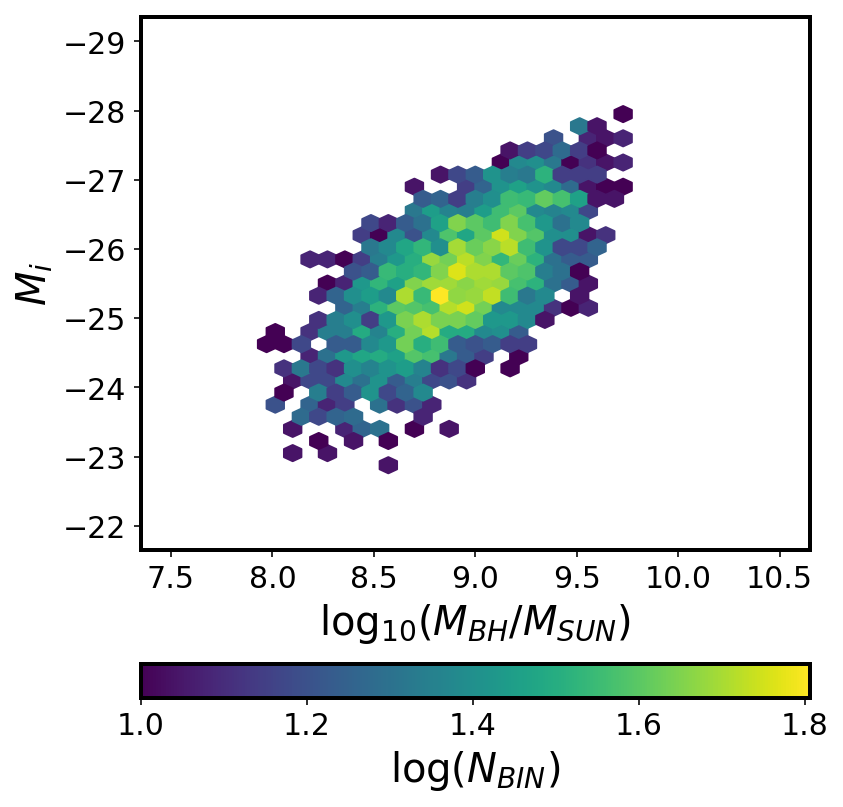

In [108]:
fig,ax =  plt.subplots(1,1,figsize=(6,7))
cmap = 'viridis'
image = ax.hexbin(MBH, MI,extent = [7.5,10.5, -22,-29],  cmap=cmap,
                    gridsize=35, bins='log', mincnt=10.
                    ) # vmin = 0.6, vmax =3., 
ax.invert_yaxis() 
ax.set_xlabel(r'$\log_{10}{(M_{BH} / M_{SUN})}$')
ax.set_ylabel(r'$M_{i}$')
left, bottom, width, height = 0.55, 0.49, 0.35, 0.02

vmin, vmax = image.get_clim()
print(vmin,vmax)
norm = mpl.colors.Normalize(vmin=np.log10(vmin), vmax=np.log10(vmax))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=image.get_cmap())
cmap.set_array([])

plt.colorbar(mappable = cmap, orientation='horizontal',
            label=r'$\log{(N_{BIN})}$')

## Fig.14 : trends with luminosity, black hole mass....

In [107]:
plt.hexbin?

In [53]:
np.sum(~m)

1811

Saved as  macleod2010_Fig14_Shen2011_sdss-ps1.png


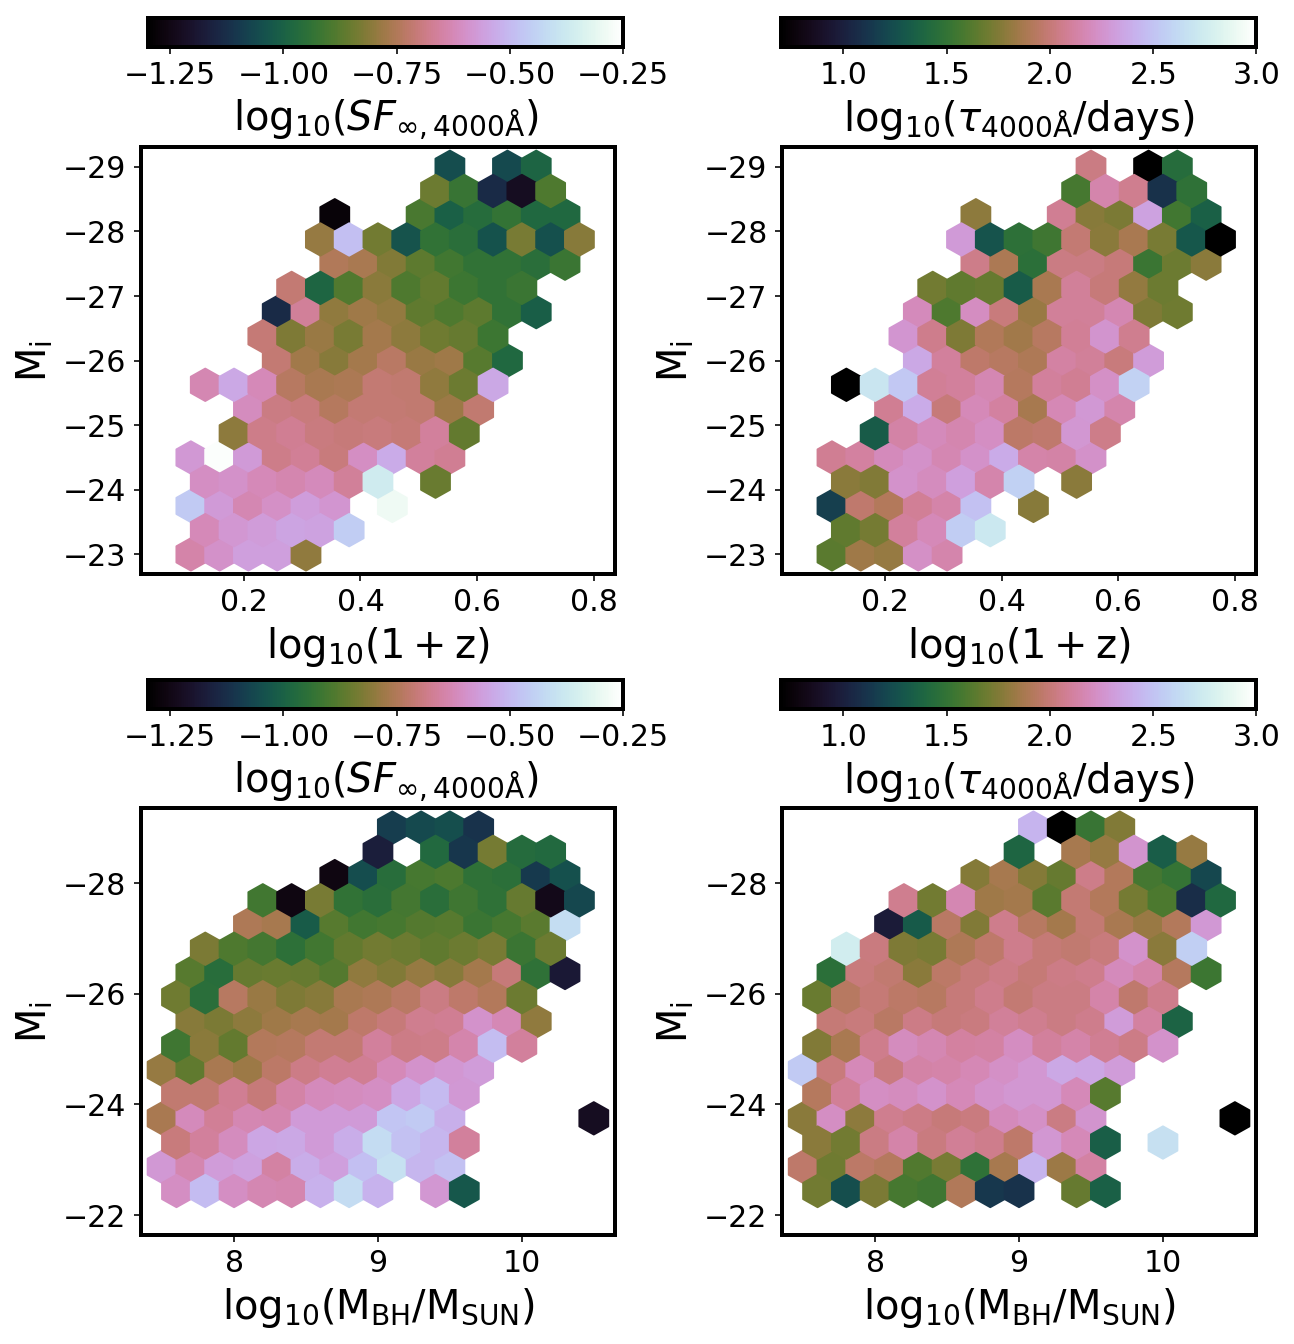

In [124]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
# Make figure like Fig.14 using Chelsea's results ...
fig,axs = plt.subplots(2,2, figsize=(10,10))
ax = np.ravel(axs)
cmap = 'cubehelix'#'magma'# 'viridis'


lambdaobs = 6250 # angstroms  - since these are the results for 
# combined SDSS r-band, centered on 6250 Angstroms 
qso['lambdaRF'] = lambdaobs /  (1.+ qso['REDSHIFT'])

seg = 'sdss-ps1'

tauRF = qso['tauEXP_'+seg] / (1.+ qso['REDSHIFT'])
tau4000 = tauRF * np.power(4000/qso['lambdaRF'], 0.17) # B=0.17 for tau

sfinf = qso['sigmaEXP_'+seg] * np.sqrt(2)
sf4000 = sfinf * np.power(4000/qso['lambdaRF'], -0.479 ) # B = -0.479 for SFinf 


gridsize=15
m = qso['tauEXP_'+seg] > 5 

# plotted quantities : 
# absolute i-band magnitude 
Mi = qso['MI_Z2'][m]
# redshift
z = qso['REDSHIFT'][m]
# black hole mass from Shen+2011 
MBH = qso['LOGBH'][m]


# tau corrected to 4000 A 
tau = tau4000[m]

# sf inf corrected to 4000 A 
sf = sf4000[m]

# upper left 
image = ax[0].hexbin(np.log10(1.+z), Mi, np.log10(sf),
            extent = [0.06,0.8, -23,-29], cmap=cmap, vmin=-1.3, vmax = -0.25,
            gridsize=gridsize)
ax[0].invert_yaxis()
ax[0].set_xlabel(r'$\log_{10}{\mathrm{(1+z)}}$')
left, bottom, width, height = 0.13, 0.95, 0.33, 0.02
cax = fig.add_axes([left,bottom,width,height])
plt.colorbar(mappable = image, cax = cax, orientation='horizontal',
            label=r'$\log_{10}{(SF_{\infty, 4000 \mathrm{\AA}})}$')

fig.subplots_adjust(hspace=0.4)

# upper right 
image = ax[1].hexbin(np.log10(1+z), Mi, np.log10(tau),
            extent = [0.06,0.8, -23,-29], cmap=cmap, vmin=0.7, vmax = 3.0,
                           gridsize=gridsize)
ax[1].invert_yaxis()
ax[1].set_xlabel(r'$\log_{10}{\mathrm{(1+z)}}$')

left, bottom, width, height = 0.57, 0.95, 0.33, 0.02
cax = fig.add_axes([left,bottom,width,height])
plt.colorbar(mappable = image, cax = cax, orientation='horizontal',
            label=r'$\log_{10}{(\tau _{4000 \mathrm{\AA}}/\mathrm{days})}$')



# lower left 
image = ax[2].hexbin(MBH,Mi, np.log10(sf),
            extent = [7.5,10.5, -22,-29],  cmap=cmap,
                    gridsize=gridsize, 
                     vmin = -1.3, vmax =-0.25, )
ax[2].invert_yaxis() 
ax[2].set_xlabel(r'$\log_{10}{\mathrm{(M_{BH} / M_{SUN})}}$')
left, bottom, width, height = 0.13, 0.49, 0.33, 0.02
cax = fig.add_axes([left,bottom,width,height])
plt.colorbar(mappable = image, cax = cax, orientation='horizontal',
            label=r'$\log_{10}{(SF_{\infty, 4000 \mathrm{\AA}})}$')

# lower right 
image = ax[3].hexbin(MBH,Mi, np.log10(tau), vmin =0.7, vmax=3.0,
            extent = [7.5,10.5, -22,-29],  cmap=cmap, 
                    gridsize=gridsize, 
                    ) # vmin = 0.6, vmax =3., 
ax[3].invert_yaxis() 
ax[3].set_xlabel(r'$\log_{10}{\mathrm{(M_{BH} / M_{SUN})}}$')
left, bottom, width, height = 0.57, 0.49, 0.33, 0.02
cax = fig.add_axes([left,bottom,width,height])
plt.colorbar(mappable = image, cax = cax, orientation='horizontal',
            label=r'$\log_{10}{(\tau_{4000 \mathrm{\AA}}/\mathrm{days})}$')

for i in range(len(ax)):
    ax[i].set_ylabel(r'$\mathrm{M_{i}}$')

fig.subplots_adjust(wspace=0.35 , hspace=0.55)
#fig.text(0.45,0.99,'Shen+2011', fontsize=19)
figname =  'macleod2010_Fig14_Shen2011_'+seg+'.png'
plt.savefig(figname, bbox_inches='tight', dpi=100)
print('Saved as ', figname)

(array([  60.,  159.,  319.,  649.,  879., 1190., 1493., 1552.,  857.,
         136.]),
 array([0.20087266, 0.51067125, 0.82046985, 1.13026844, 1.44006703,
        1.74986562, 2.05966422, 2.36946281, 2.6792614 , 2.98905999,
        3.29885859]),
 <a list of 10 Patch objects>)

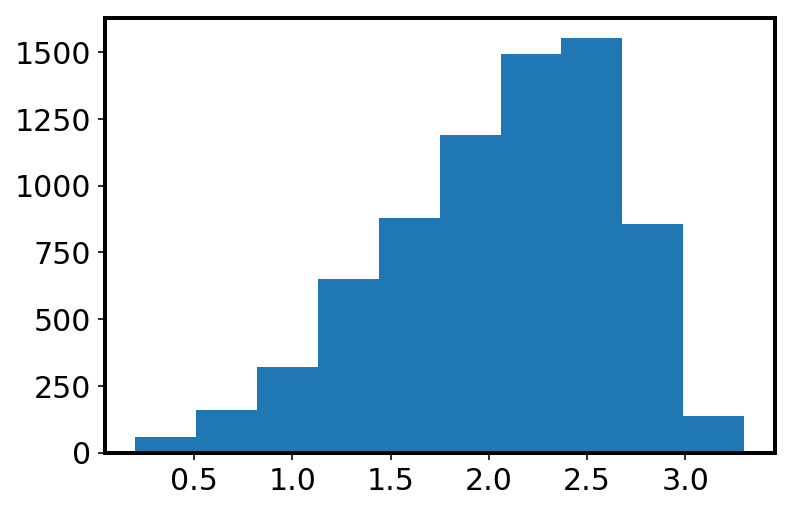

In [71]:
plt.hist(np.log10(tau) )

(array([  13.,   36.,  201.,  777., 1859., 2204., 1491.,  546.,  152.,
          15.]),
 array([-1.57694826, -1.41953673, -1.26212521, -1.10471369, -0.94730216,
        -0.78989064, -0.63247912, -0.47506759, -0.31765607, -0.16024455,
        -0.00283302]),
 <a list of 10 Patch objects>)

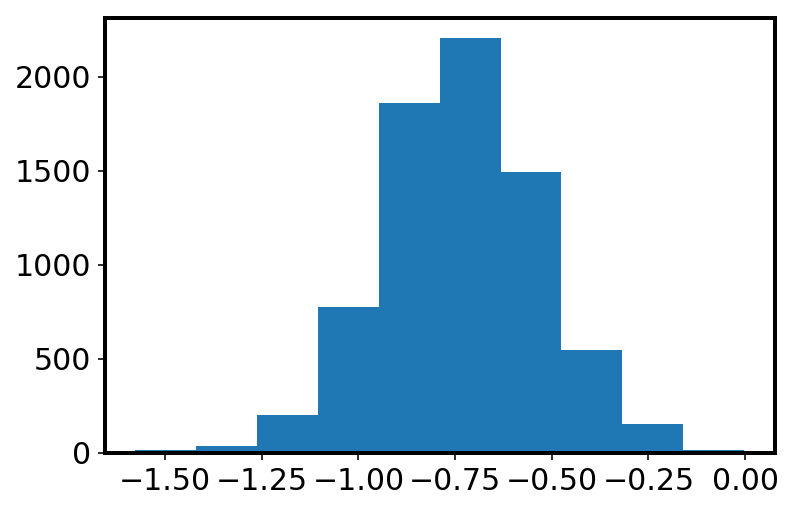

In [76]:
plt.hist(np.log10(sf) )

Check the K-correction factors from http://www.astrouw.edu.pl/~simkoz/AGNcalc/ : are they to z=2 or z=0 ? Plot k as a function of redshift

In [5]:
k = Table.read("Kcorr_QSO_r.dat.txt", format='ascii',names=['z',"K"])

Text(0, 0.5, 'K corr')

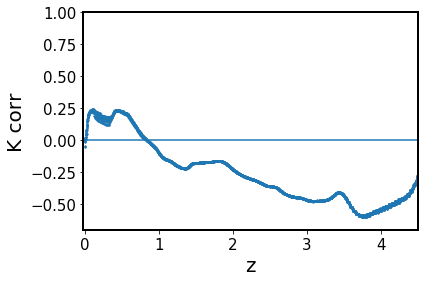

In [23]:
%matplotlib inline
plt.scatter(k['z'], k['K'],s=2 )
plt.ylim(-0.7,1)
plt.xlim(-0.02,4.5)
plt.axhline(0)
plt.xlabel('z')
plt.ylabel("K corr")

it is 0 at z=0 as well as z~0.75 .... Thus I think he's correcting to z=0.

# Healpix : make a plot rather than a table ... 

In [63]:
def return_stellar_counts(healpix_table, nside, fancy_formatting = True):
    ''' A convenience function to take the table of 
    stellar density per healpixel, with 
    ra,dec in rad, and frac_greater,  
    and return :
    
    * N stars in all healpixels
    * N stars in healpixels within top 1%, top 10% density
    * N stars in exclusion zone
    * N stars in the main survey area with / without exclusion zone
    * N stars and area of all healpixels that are  in the main survey area, 
    without exclusion zone, and stellar density lower than rho, with (per sq. deg.) 
    rho = 35,000; 100,000; 200,000, 400,000, 800,000, 1 million, 2 million . 

    NOTE:  
    By default,  the healpixels have the galaxy centered on (l,b) = (0,0). 
    To make it easier to incorporate the confusion zone defined for 
    galaxy centered on (l,b) = (180,0), we shift the coordinates. 

    # Galactic confusion zone : 
    # |b| within the straight
    # lines starting at |b| = 10 deg at l=0 deg, 
    # and dropping linearly to 0 at 
    # l = 90 and l = 270.  
    
    '''
    px_area_sq_deg = hp.nside2pixarea(nside,degrees=True) 
    
    # * N stars in all healpixels
    N_all_stars = np.sum(healpix_table['source_density'] * px_area_sq_deg)
    print('N stars in all healpixels: ', N_all_stars)
    
    #* N stars in healpixels within top 1%, top 10% density
    for density_percentile in [1,10]:
        density = density_percentile / 100.0
        select_density  = healpix_table['frac_greater'] < density
        N_stars = np.sum(healpix_table[select_density]['source_density'] * px_area_sq_deg)
        print('N stars in top ', density_percentile,'%',' :', N_stars)
        
    #* N stars in confusion zone
    healpix_coords = SkyCoord(healpix_table['ra_rad'],
                          healpix_table['dec_rad'], frame='icrs', unit='rad')

    l,b = healpix_coords.galactic.l.deg, healpix_coords.galactic.b.deg
    # shift to coords where the galactic center is at (l,b)=(180,0)
    # rather than the traditional (l,b) = (0,0)
    mRight  = l < 180
    mLeft  = l > 180
    l[mLeft] = l[mLeft] - 180
    l[mRight] = l[mRight] + 180

    a = 0.1111111111111111
    m1 = b < -(a * l)  + 30  # l1
    m2 = b >  (a * l)  - 30  # l2
    m3 = b > -(a * l)  + 10  # l3 
    m4 = b <  (a * l)  - 10  # l4

    m_c = m1*m2*m3*m4 # inside confusion zone 
    N_sources =  np.sum(healpix_table[m_c]['source_density'] * px_area_sq_deg)
    print('N stars in confusion zone:', N_sources)
    
    # the main survey area
    dec = healpix_coords.dec.deg
    m_s = (-65 < dec) * (dec<5)

    #* N stars in the main survey area with / without exclusion zone
    for m, label in zip([m_s, m_s*(~m_c)], ['with', 'without']):
        area = np.sum(m)* px_area_sq_deg
        N  =  np.sum(healpix_table[m]['source_density'] * px_area_sq_deg)
        print('N stars in the main survey area ',label,' conf.zone: ', N, ', ', 
              area,' sq.deg.')
        
        
    # * N stars and area of all healpixels that are  in the main survey area, 
    #  without exclusion zone, and stellar density lower than rho, with (per sq. deg.) 
    #  rho = 35,000; 100,000; 200,000, 400,000, 800,000, 1 million, 2 million . 
    print('N stars and area of healpixels in the main survey area')
    print(' without exclusion zone, stellar density lower than rho')
    print('rho   |   area   |   N stars ')
    rhos =[35000, 1e5, 2e5, 3e5,4e5, 6e5,7e5, 8e5, 1e6, 2e6]
    if  fancy_formatting : 
        rhos_str = [density_fmt(r) for r in rhos]
        t = Table(data = [rhos_str], names = [r'$\rho$'], dtype=[str])
        t['N'] = '0000000000'
        t['percWFDltRho'] = '00000000'
        #t['percWFDgtRho'] = 0.0
        t['percConfltRho'] = '00000000'
        #t['percConfgtRho'] = 0.0
    else:
        t = Table(data = [rhos], names = ['rho'], dtype=[float])
        t['N'] = 0
        t['percWFDltRho'] = 0
        #t['percWFDgtRho'] = 0.0
        t['percConfltRho'] = 0
    #t['percConfgtRho'] = 0.0
    t['area'] = 0
    
    A_WFD = px_area_sq_deg * np.sum(m_s * ~m_c )
    A_conf = px_area_sq_deg * np.sum(m_c)
    
    # find what is the area of WFD 
    for i,rho in enumerate(rhos):
        
        # given rho : 
        
        # 1) what is the area within WFD with density < rho, A_WFD(<rho)
        
        # constrain area : declination
        m1 = m_s
        
        # constrain density
        mltRho = healpix_table['source_density'] < rho
        mgtRho = healpix_table['source_density'] > rho

        # remove exclusion zone 
        m3 = ~m_c

        # combine to make WFD mask 
        mlt = m1 * mltRho * m3
        mgt = m1 * mgtRho * m3
        
        # calculate area in WFD at this density or lower  
        # : number of healpixels times conversion factor 
        A_WFD_ltRho = np.sum(mlt) * px_area_sq_deg
        A_WFD_gtRho = np.sum(mgt) * px_area_sq_deg
        
        t['area'][i]= A_WFD_ltRho.round(2)
        
        # 2) what is the number of sources in that area 
        
        # calculate N sources 
        N_sources = np.sum(healpix_table[mlt]['source_density'] * px_area_sq_deg)
        if  fancy_formatting : 
            t['N'][i] = Billions(N_sources)
        else: 
            t['N'][i] = N_sources
            
        print('%8i, %6i, %11i'%(rho,  A_WFD_ltRho, N_sources))
        # 3) what is the percentage of total WFD area A_WFD(<rho) / A_WFD ? 
        
        # convert area to %of WFD
        if  fancy_formatting : 
            t['percWFDltRho'][i] = str((100 * (A_WFD_ltRho / A_WFD)).round(1))+' \%'
        else:
            t['percWFDltRho'][i] = 100 * (A_WFD_ltRho / A_WFD)
       #t['percWFDgtRho'][i] = 100 * (A_WFD_gtRho / A_WFD)
   
        # 4) what is the percentage of confusion zone at that or lower density 
        # A_conf(<rho) / A_conf ? 
        
        # convert area to %of confusion zone 
        A_conf_ltRho = np.sum(m_c * mltRho) * px_area_sq_deg
        A_conf_gtRho = np.sum(m_c * mgtRho) * px_area_sq_deg
        if  fancy_formatting : 
            t['percConfltRho'][i] = str((100 * (A_conf_ltRho / A_conf )).round(1))+' \%'
        else : 
            t['percConfltRho'][i] = 100 * (A_conf_ltRho / A_conf )
        #t['percConfgtRho'][i] = 100 * (A_conf_gtRho / A_conf )
        
        #print('Area:',area , ', N sources:',N_sources, 'per sq.deg.')
    
    return t

In [31]:
def density_fmt(x):
    if x < 1e6 : 
        return '%1.f k' % (x*1e-3)
    if x >= 1e6 : 
        return '%1.f mln' % (x*1e-6)

def Billions(x):
    'The two args are the value and tick position'
    return '%1.2f bln' % (x*1e-9)

    
def MillionsBillions(x):
    'The two args are the value and tick position'
    if x < 1e9 : 
        return '%1.2f mln' % (x*1e-6)
    if x >= 1e9 : 
        return '%1.2f bln' % (x*1e-9)

In [41]:
join?

In [65]:
healpix_table, nside = make_healpix_table(24.5)
t1 = return_stellar_counts(healpix_table, nside, False)

healpix_table, nside = make_healpix_table(27.5)
t2 = return_stellar_counts(healpix_table, nside,False)



Selecting only the source density up     to the depth of  24.5  mag
N stars in all healpixels:  3760504658.76478
N stars in top  1 %  : 1096010819.7091284
N stars in top  10 %  : 2841708463.078068
N stars in confusion zone: 2196948669.119199
N stars in the main survey area  with  conf.zone:  3162936338.885736 ,  20569.408656835276  sq.deg.
N stars in the main survey area  without  conf.zone:  1103911114.2917233 ,  19084.69819845672  sq.deg.
N stars and area of healpixels in the main survey area
 without exclusion zone, stellar density lower than rho
rho   |   area   |   N stars 
   35000,  13002,   161485401
  100000,  16226,   354829923
  200000,  17631,   553306692
  300000,  18235,   701100602
  400000,  18581,   821170347
  600000,  18920,   985810603
  700000,  19003,  1039541387
  800000,  19053,  1077311263
 1000000,  19084,  1103911114
 2000000,  19084,  1103911114
Selecting only the source density up     to the depth of  27.5  mag
N stars in all healpixels:  8504072812.654519


TableMergeError: Left table does not have key column '$\\rho$'

In [66]:
t12 = join(left=t1, right=t2, keys='rho', table_names=['lt24.5', 'lt27.5' ] )
t12

rho,N_lt24.5,percWFDltRho_lt24.5,percConfltRho_lt24.5,area_lt24.5,N_lt27.5,percWFDltRho_lt27.5,percConfltRho_lt27.5,area_lt27.5
float64,int64,int64,int64,int64,int64,int64,int64,int64
35000.0,161485401,68,0,13002,179898977,55,0,10686
100000.0,354829923,85,5,16226,405990021,75,0,14492
200000.0,553306692,92,13,17631,663514129,85,3,16300
300000.0,701100602,95,18,18235,862753997,89,5,17112
400000.0,821170347,97,23,18581,1036741614,92,8,17616
600000.0,985810603,99,33,18920,1321063932,95,12,18195
700000.0,1039541387,99,40,19003,1439524570,96,13,18378
800000.0,1077311263,99,46,19053,1545442354,97,15,18519
1000000.0,1103911114,100,57,19084,1743324923,98,20,18742


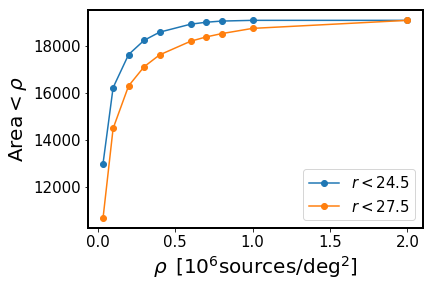

In [75]:
%matplotlib inline
t12.sort('area_lt27.5')
plt.plot(t12['rho']/1e6, t12['area_lt24.5'], '-o', label=r'$r<24.5$' )
plt.plot(t12['rho']/1e6,  t12['area_lt27.5'], '-o',label=r'$r<27.5$')
#plt.xticks(rotation='45')
plt.ylabel('Area'+r'$<\rho$')
plt.xlabel(r'$\rho \,\,\,[10^{6} \mathrm{sources} / \mathrm{deg}^{2}]$')
plt.legend(loc='lower right', fontsize=15)

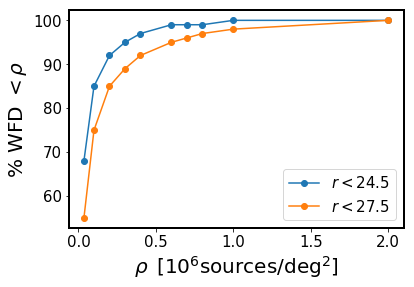

In [84]:
%matplotlib inline
t12.sort('area_lt27.5')
plt.plot(t12['rho'] / 1e6, t12['percWFDltRho_lt24.5'], '-o', label=r'$r<24.5$' )
plt.plot(t12['rho']/ 1e6,  t12['percWFDltRho_lt27.5'], '-o',label=r'$r<27.5$')

plt.ylabel('% WFD '+r'$<\rho$')
plt.xlabel(r'$\rho \,\,\,[10^{6} \mathrm{sources} / \mathrm{deg}^{2}]$')
plt.legend(loc='lower right', fontsize=15)

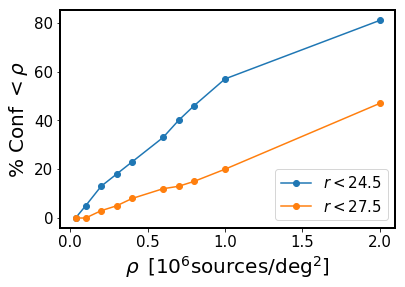

In [85]:
%matplotlib inline
t12.sort('area_lt27.5')
plt.plot(t12['rho'] / 1e6, t12['percConfltRho_lt24.5'], '-o', label=r'$r<24.5$' )
plt.plot(t12['rho']/ 1e6,  t12['percConfltRho_lt27.5'], '-o',label=r'$r<27.5$')

plt.ylabel('% Conf '+r'$<\rho$')
plt.xlabel(r'$\rho \,\,\,[10^{6} \mathrm{sources} / \mathrm{deg}^{2}]$')
plt.legend(loc='lower right', fontsize=15)

In [35]:
from astropy.table import join

t1.rename_column('area', 'A(r<24.5)')
t1.rename_column('N', 'N(r<24.5)')
t1.rename_column('percWFDltRho', 'WFD(<24.5)')
t1.rename_column('percConfltRho', 'CZ(<24.5)')
t2.rename_column('area', 'A(r<27.5)')
t2.rename_column('N', 'N(r<27.5)')
t2.rename_column('percWFDltRho', 'WFD(<27.5)')
t2.rename_column('percConfltRho', 'CZ(<27.5)')
                 
t = join(left=t1, right=t2, keys=r'$\rho$')

In [36]:
t.sort('A(r<27.5)')
t[[r'$\rho$', 'A(r<24.5)','A(r<27.5)','N(r<24.5)','N(r<27.5)',
  'WFD(<24.5)','WFD(<27.5)','CZ(<24.5)', 'CZ(<27.5)']].write('galfast_counts.txt',
                                                            format = 'latex',
                                                            overwrite=True)

In [37]:
t.write('galfast_counts.txt', format='latex')

In [38]:
t

$\rho$,A(r<24.5),N(r<24.5),WFD(<24.5),CZ(<24.5),A(r<27.5),N(r<27.5),WFD(<27.5),CZ(<27.5)
str5,int64,str10,str8,str8,int64,str10,str8,str8
35 k,13002,0.16 bln,68.1 \%,0.9 \%,10686,0.18 bln,56.0 \%,0.1 \%
100 k,16226,0.35 bln,85.0 \%,5.7 \%,14492,0.41 bln,75.9 \%,0.9 \%
200 k,17631,0.55 bln,92.4 \%,13.2 \%,16300,0.66 bln,85.4 \%,3.6 \%
300 k,18235,0.70 bln,95.5 \%,18.5 \%,17112,0.86 bln,89.7 \%,5.6 \%
400 k,18581,0.82 bln,97.4 \%,23.8 \%,17616,1.04 bln,92.3 \%,8.5 \%
600 k,18920,0.99 bln,99.1 \%,33.9 \%,18195,1.32 bln,95.3 \%,12.0 \%
700 k,19003,1.04 bln,99.6 \%,40.1 \%,18378,1.44 bln,96.3 \%,13.8 \%
800 k,19053,1.08 bln,99.8 \%,46.5 \%,18519,1.55 bln,97.0 \%,15.7 \%
1 mln,19084,1.10 bln,100.0 \%,57.5 \%,18742,1.74 bln,98.2 \%,20.5 \%


In [ ]:
x